## Test for equal numbers of files between test, train, and val sets at awk and npz levels

In [3]:
prefix_match = {
    "JZ0": 'user.mswiatlo.39955613',
    "JZ1": 'user.mswiatlo.39955646',
    "JZ2": 'user.mswiatlo.39955678',
    "JZ3": 'user.mswiatlo.39955704',
    "JZ4": 'user.mswiatlo.39955735',
    "JZ5": 'user.mswiatlo.39955768',
    "JZ6": 'user.mswiatlo.39955825',
}

prefix_to_set = {j:i for i,j in prefix_match.items()}


In [63]:
import os
from preprocessing_header import AWK_SAVE_LOC, NPZ_SAVE_LOC, FILES_DIR, MAX_SAMPLE_LENGTH, INCLUDE_SETS_TO_NPZ
import re

# Specify the directory path
dirs_names = ['train', 'val', 'test']

root_dir_lens = {}
for dir in os.listdir(FILES_DIR):
    entries = os.listdir(FILES_DIR + dir)
    number_of_files = sum(os.path.isfile(os.path.join(FILES_DIR + dir, entry)) for entry in entries)
    dir_short_name = re.search(r'JZ[0-9]|JZ10', dir).group()
    root_dir_lens[dir_short_name] = number_of_files
    print(f'{dir_short_name} contains {number_of_files} files with 500 events')

root_files = sum(root_dir_lens.values())
print(f"FOUND {root_files} root files containing {root_files * 500:10,} events")

print("-" * 27)

# Get a list of all entries in the directory
awk_file_numbers = []
for dir in dirs_names:
    directory_path = AWK_SAVE_LOC / dir
    entries = os.listdir(directory_path)
    number_of_files = sum(os.path.isfile(os.path.join(directory_path, entry)) for entry in entries)
    awk_file_numbers.append(number_of_files)
    print(f"AWK {dir:<5} contains {number_of_files} files")
print(f"AWK {'total':<5} contains {sum(awk_file_numbers)} files")

print("-" * 27)

npz_file_numbers = []
for dir in dirs_names:
    directory_path = NPZ_SAVE_LOC / dir
    entries = os.listdir(directory_path)
    number_of_files = sum(os.path.isfile(os.path.join(directory_path, entry)) for entry in entries)
    npz_file_numbers.append(number_of_files)
    print(f"NPZ {dir:<5} contains {number_of_files} files")
print(f"NPZ {'total':<5} contains {sum(npz_file_numbers)} files")

print("-" * 27)


print(f'ROOT to AWK is {100 * awk_file_numbers[0]/root_files:4.1f}% complete')
print(f'AWK  to NPZ is {100 * npz_file_numbers[0]/awk_file_numbers[0]:4.1f}% complete')

print("-" * 27)

JZ4 contains 179 files with 500 events
JZ5 contains 154 files with 500 events
JZ3 contains 427 files with 500 events
JZ1 contains 981 files with 500 events
JZ2 contains 954 files with 500 events
JZ6 contains 150 files with 500 events
JZ0 contains 990 files with 500 events
FOUND 3835 root files containing  1,917,500 events
---------------------------
AWK train contains 1129 files
AWK val   contains 1129 files
AWK test  contains 1129 files
AWK total contains 3387 files
---------------------------
NPZ train contains 934 files
NPZ val   contains 934 files
NPZ test  contains 0 files
NPZ total contains 1868 files
---------------------------
ROOT to AWK is 29.4% complete
AWK  to NPZ is 82.7% complete
---------------------------


## Get file sizes of the root, awk, and npz files

In [39]:
import subprocess

def get_directory_size(directory):
    # Run the 'du' command to get the size of the directory
    # The '-s' option gives the total size of the directory
    # The '-k' option lists the size in kilobytes
    result = subprocess.run(['du', '-sk', directory], capture_output=True, text=True)
    # The output is in the format "size directory_name", we split on whitespace
    return int(result.stdout.split()[0])
    
root_size = get_directory_size(FILES_DIR)
print(f"ROOT {'':<4} is {(root_size/1024/1024):4.0f}GB large")

print("-" * 25)

awk_file_sizes = []
for dir in dirs_names:
    directory_path = AWK_SAVE_LOC / dir
    size = get_directory_size(directory_path)
    awk_file_sizes.append(size)
    print(f"AWK {dir:<5} is {(size/1024/1024):4.0f}GB large")
print(f"NPZ {'total':<5} is {(sum(awk_file_sizes)/1024/1024):4.0f}GB large")

print("-" * 25)

npz_file_sizes = []
for dir in dirs_names:
    directory_path = NPZ_SAVE_LOC / dir
    size = get_directory_size(directory_path)
    npz_file_sizes.append(size)
    print(f"NPZ {dir:<5} is {(size/1024/1024):4.0f}GB large")
print(f"NPZ {'total':<5} is {(sum(npz_file_sizes)/1024/1024):4.0f}GB large")

print("-" * 25)

print(f"TOTAL {'':<3} is {((root_size + sum(npz_file_sizes) + sum(awk_file_sizes))/1024/1024):4.0f}GB large")

ROOT      is  160GB large
-------------------------
AWK train is   48GB large
AWK val   is   26GB large
AWK test  is   13GB large
NPZ total is   87GB large
-------------------------
NPZ train is  160GB large
NPZ val   is    0GB large
NPZ test  is    0GB large
NPZ total is  160GB large
-------------------------
TOTAL     is  407GB large


## Find event sample lengths

In [56]:
from pathlib import Path
import json
import re
json_loc = Path(AWK_SAVE_LOC).parent / "metadata" / "sample_length_calcs.json"
with open(json_loc, 'r') as f:
    results = json.load(f)

In [60]:
lengths_dict = {f"JZ{i}": [] for i in range(7)}

for key, value in results.items():
    for i in value:
        lengths_dict[prefix_to_set[i[1][:len('user.mswiatlo.39955613')]]].append(max(i[0]))

JZ0 95th percentile: Excluded
JZ1 95th percentile: Excluded
JZ2 95th percentile: 633.0
JZ3 95th percentile: Excluded
JZ4 95th percentile: 949.2
JZ5 95th percentile: 1010.6
JZ6 95th percentile: Excluded
Max Sample Length is 1028
Number of included files: 3374
13 files EXLUDED from last sample length search


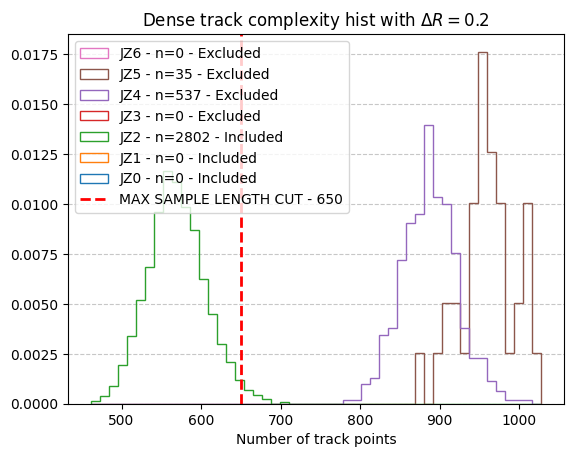

In [66]:
import matplotlib.pyplot as plt
import numpy as np


rates = lengths_dict.values()
included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(lengths_dict[i])} - {included_dict[i in INCLUDE_SETS_TO_NPZ]} " for i in lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(rates, label=labels, bins=50, histtype='step', fill=False, density=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.yscale('log')
plt.title("Dense track complexity hist with $\Delta R =0.2$")
plt.xlabel("Number of track points")


plt.axvline(x=MAX_SAMPLE_LENGTH, color='red', linestyle='--', linewidth=2, label=f'MAX SAMPLE LENGTH CUT - {MAX_SAMPLE_LENGTH}')
plt.legend()

for i in lengths_dict.keys():
    print(f"{i} 95th percentile: {np.percentile(lengths_dict[i], 95) if  len(lengths_dict[i]) != 0 else 'Excluded'}")


print(f"Max Sample Length is {max([max(lengths_dict[f'JZ{i}']) for i in range(7) if len(lengths_dict[f'JZ{i}']) != 0])}")
print(f"Number of included files: {sum([len(lengths_dict[f'JZ{i}']) for i in range(7)])}")
print(f"{(sum(awk_file_numbers)-sum([len(lengths_dict[f'JZ{i}']) for i in range(7)]))} files EXLUDED from last sample length search")

In [ ]:
import os

# Directory to check
directory = '/fast_scratch_1/atlas/pflow/20240614/user.mswiatlo.801167.Py8EG_A14NNPDF23LO_jj_JZ2.recon.ESD.e8514_e8528_s4185_s4114_r14977_2024.06.14.1_mltree.root'

# Prefix to check for
prefix = 'user.mswiatlo.39955678'

def all_files_start_with_prefix(directory, prefix):
    # Check if the path is a directory
    if not os.path.isdir(directory):
        return "Error: The provided path is not a directory."

    # List all files in the directory
    try:
        files = os.listdir(directory)
    except FileNotFoundError:
        return "Error: Directory not found."
    except PermissionError:
        return "Error: Permission denied."

    # Check if each file starts with the prefix
    for file in files:
        if not file.startswith(prefix):
            return False
    return True

# Use the function and print the result
result = all_files_start_with_prefix(directory, prefix)
print(result)

True


In [65]:
for i in lengths_dict.keys():
    print(f"Set {i} is {100 * len(lengths_dict[i])/(3*root_dir_lens[i]):6.2f}% complete")

Set JZ0 is   0.00% complete
Set JZ1 is   0.00% complete
Set JZ2 is  97.90% complete
Set JZ3 is   0.00% complete
Set JZ4 is 100.00% complete
Set JZ5 is   7.58% complete
Set JZ6 is   0.00% complete
